In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Data preprocessing 

It is a crucial step in the machine learning pipeline, as the quality of the data greatly impacts the performance of models. Preprocessing involves cleaning, transforming, and encoding data to ensure it is suitable for analysis or machine learning.

The key steps in data preprocessing include:
- Handling missing data
- Handling duplicated data
- Feature scaling
- Encoding categorical variables
- Handling outliers

In [2]:
movies = pd.read_csv(r'imdb-top-1000.csv')

### Feature Scaling

Feature scaling is a crucial step in data preprocessing that ensures all numerical features contribute equally to the machine learning model. It transforms the values of features so that they share a similar scale, which improves the efficiency and accuracy of many machine learning algorithms.

In [3]:
# Identifying columns that may require feature scaling
numerical_features = movies.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Columns:")
print(numerical_features)


Numerical Columns:
Index(['Runtime', 'IMDB_Rating', 'No_of_Votes', 'Gross', 'Metascore'], dtype='object')


In [4]:
# Check if feature scaling is necessary by examining the range of values for each numerical column
for column in numerical_features:
    column_range = movies[column].max() - movies[column].min()
    print(f"Range of '{column}': {column_range}")


Range of 'Runtime': 276
Range of 'IMDB_Rating': 1.700000000000001
Range of 'No_of_Votes': 2318022
Range of 'Gross': 936660920.0
Range of 'Metascore': 72.0


Feature scaling refers to techniques used to standardize or normalize the values of features in a dataset so that they are on a comparable scale. This is particularly important for algorithms sensitive to the scale of data, such as **Support Vector Machines (SVM)**, **K-Nearest Neighbors (KNN)**, and **gradient-based optimization algorithms**

Feature scaling ensures that features do not dominate others simply because of their scale, which can prevent biased results.

feature scaling using **MinMaxScaler** and **StandardScaler** from Scikit-Learn

In [5]:
# Selecting numerical columns to apply feature scaling
features_to_scale = ['Runtime', 'IMDB_Rating', 'No_of_Votes', 'Gross', 'Metascore']

In [6]:
movies

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0
...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115,Comedy,7.6,Blake Edwards,Audrey Hepburn,166544,679874270.0,76.0
996,Giant,1956,201,Drama,7.6,George Stevens,Elizabeth Taylor,34075,195217415.0,84.0
997,From Here to Eternity,1953,118,Drama,7.6,Fred Zinnemann,Burt Lancaster,43374,30500000.0,85.0
998,Lifeboat,1944,97,Drama,7.6,Alfred Hitchcock,Tallulah Bankhead,26471,852142728.0,78.0


1. **Normalization (Min-Max Scaling)**:
   - Scales values to fit within a fixed range, typically [0, 1].
   - Formula: `(X - min) / (max - min)`

In [7]:
scaler_minmax = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(movies[features_to_scale]), columns=features_to_scale)
print("\nDataset After Min-Max Scaling:")
df_minmax_scaled


Dataset After Min-Max Scaling:


,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore
0,0.351449,1.000000,1.000000,0.030257,0.722222
1,0.471014,0.941176,0.688207,0.144092,1.000000
2,0.387681,0.823529,0.982797,0.571025,0.777778
3,0.568841,0.823529,0.476641,0.061173,0.861111
4,0.184783,0.823529,0.286778,0.004653,0.944444
...,...,...,...,...,...
995,0.253623,0.000000,0.061024,0.725847,0.666667
996,0.565217,0.000000,0.003877,0.208417,0.777778
997,0.264493,0.000000,0.007889,0.032561,0.791667
998,0.188406,0.000000,0.000597,0.909765,0.694444


In [8]:
# movie columns 'Runtime', 'IMDB_Rating', 'No_of_Votes', 'Gross', 'Metascore' in original dataset
print("\nOriginal Dataset:")
movies[features_to_scale]


Original Dataset:


,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore
0,142,9.3,2343110,28341469.0,80.0
1,175,9.2,1620367,134966411.0,100.0
2,152,9.0,2303232,534858444.0,84.0
3,202,9.0,1129952,57300000.0,90.0
4,96,9.0,689845,4360000.0,96.0
...,...,...,...,...,...
995,115,7.6,166544,679874270.0,76.0
996,201,7.6,34075,195217415.0,84.0
997,118,7.6,43374,30500000.0,85.0
998,97,7.6,26471,852142728.0,78.0


In [9]:
# max vlue of IMDB_Rating in original dataset
print("\nMax Value of 'IMDB_Rating' in Original Dataset:")
movies['IMDB_Rating'].max()

# max vlue of No_of_votes in original dataset
print("\nMax Value of 'No_of_Votes' in Original Dataset:")
movies['No_of_Votes'].max()


Max Value of 'IMDB_Rating' in Original Dataset:

Max Value of 'No_of_Votes' in Original Dataset:


np.int64(2343110)

2. **Standardization (Z-score Normalization)**:
   - Scales values to have a mean of 0 and a standard deviation of 1.
   - Formula: `(X - mean) / std`
   - Standardization transforms the features so they have a mean of 0 and a standard deviation of 1.

In [10]:
# Standardization using StandardScaler
scaler_standard = StandardScaler()
df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(movies[features_to_scale]), columns=features_to_scale)
print("\nDataset After Standardization (Z-score Normalization):")
df_standard_scaled


Dataset After Standardization (Z-score Normalization):


,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore
0,0.680529,4.905332,6.324451,-0.497171,0.163999
1,1.855759,4.542162,4.115639,0.033274,1.780977
2,1.036659,3.815823,6.202578,2.022683,0.487395
3,2.817310,3.815823,2.616857,-0.353106,0.972488
4,-0.957670,3.815823,1.271824,-0.616476,1.457581
...,...,...,...,...,...
995,-0.281022,-1.268551,-0.327463,2.744117,-0.159396
996,2.781697,-1.268551,-0.732308,0.333014,0.487395
997,-0.174183,-1.268551,-0.703889,-0.486433,0.568244
998,-0.922057,-1.268551,-0.755547,3.601130,0.002302


In [11]:
print("\nOriginal Dataset:")
movies[features_to_scale]


Original Dataset:


,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore
0,142,9.3,2343110,28341469.0,80.0
1,175,9.2,1620367,134966411.0,100.0
2,152,9.0,2303232,534858444.0,84.0
3,202,9.0,1129952,57300000.0,90.0
4,96,9.0,689845,4360000.0,96.0
...,...,...,...,...,...
995,115,7.6,166544,679874270.0,76.0
996,201,7.6,34075,195217415.0,84.0
997,118,7.6,43374,30500000.0,85.0
998,97,7.6,26471,852142728.0,78.0


In [12]:
# update the original dataset with the scaled values (Min-Max/Standard)
movies[features_to_scale] = df_standard_scaled
print("\nUpdated Dataset:")
movies[features_to_scale]


Updated Dataset:


,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore
0,0.680529,4.905332,6.324451,-0.497171,0.163999
1,1.855759,4.542162,4.115639,0.033274,1.780977
2,1.036659,3.815823,6.202578,2.022683,0.487395
3,2.817310,3.815823,2.616857,-0.353106,0.972488
4,-0.957670,3.815823,1.271824,-0.616476,1.457581
...,...,...,...,...,...
995,-0.281022,-1.268551,-0.327463,2.744117,-0.159396
996,2.781697,-1.268551,-0.732308,0.333014,0.487395
997,-0.174183,-1.268551,-0.703889,-0.486433,0.568244
998,-0.922057,-1.268551,-0.755547,3.601130,0.002302


Recommendation
- Min-Max Scaling: Best if your dataset is used with Neural Networks, KNN, or algorithms that don’t assume a particular distribution and do not contain extreme outliers.
- Standardization: Preferred if your dataset is used with SVM, Logistic Regression, or other algorithms that are sensitive to the data distribution, and if there are significant differences in scale between features.

### Encoding Categorical Variables

It is common in real-world datasets and represents non-numeric data that can take on a limited, fixed number of values. 

In [13]:
# Identify categorical columns in the dataset
categorical_columns = movies.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['Series_Title', 'Released_Year', 'Genre', 'Director', 'Star1'], dtype='object')


In [14]:
# Convert Released_Year to datetime
movies['Released_Year'] = pd.to_datetime(movies['Released_Year'], errors='coerce')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Series_Title   1000 non-null   object        
 1   Released_Year  999 non-null    datetime64[ns]
 2   Runtime        1000 non-null   float64       
 3   Genre          1000 non-null   object        
 4   IMDB_Rating    1000 non-null   float64       
 5   Director       1000 non-null   object        
 6   Star1          1000 non-null   object        
 7   No_of_Votes    1000 non-null   float64       
 8   Gross          1000 non-null   float64       
 9   Metascore      843 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 78.3+ KB


In [15]:
movies

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994-01-01,0.680529,Drama,4.905332,Frank Darabont,Tim Robbins,6.324451,-0.497171,0.163999
1,The Godfather,1972-01-01,1.855759,Crime,4.542162,Francis Ford Coppola,Marlon Brando,4.115639,0.033274,1.780977
2,The Dark Knight,2008-01-01,1.036659,Action,3.815823,Christopher Nolan,Christian Bale,6.202578,2.022683,0.487395
3,The Godfather: Part II,1974-01-01,2.817310,Crime,3.815823,Francis Ford Coppola,Al Pacino,2.616857,-0.353106,0.972488
4,12 Angry Men,1957-01-01,-0.957670,Crime,3.815823,Sidney Lumet,Henry Fonda,1.271824,-0.616476,1.457581
...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961-01-01,-0.281022,Comedy,-1.268551,Blake Edwards,Audrey Hepburn,-0.327463,2.744117,-0.159396
996,Giant,1956-01-01,2.781697,Drama,-1.268551,George Stevens,Elizabeth Taylor,-0.732308,0.333014,0.487395
997,From Here to Eternity,1953-01-01,-0.174183,Drama,-1.268551,Fred Zinnemann,Burt Lancaster,-0.703889,-0.486433,0.568244
998,Lifeboat,1944-01-01,-0.922057,Drama,-1.268551,Alfred Hitchcock,Tallulah Bankhead,-0.755547,3.601130,0.002302


In [16]:
# Identify categorical columns in the dataset
categorical_columns = movies.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['Series_Title', 'Genre', 'Director', 'Star1'], dtype='object')


Encoding categorical variables transforms them into a format that allows machine learning algorithms to extract meaningful information.

There are several ways to encode categorical variables:

1. **Label Encoding**:
   - Assigns a unique integer to each category.
   - Suitable for **ordinal** categorical variables (i.e., variables that have a natural order).
   - Not ideal for **nominal** categorical variables (i.e., variables that do not have a natural order) because numerical relationships are implied.

2. **One-Hot Encoding**:
   - Creates binary columns (0 or 1) for each unique category in the feature.
   - Suitable for **nominal** categorical variables.
   - Helps to avoid the issue of implied numerical relationships between categories.
"""

An **ordinal** variable is a categorical variable with a clear, meaningful order.

Example: Movie Ratings such as "Poor", "Average", "Good", "Excellent".

In this case, we can use Label Encoding:
- "Poor" -> 0
- "Average" -> 1
- "Good" -> 2
- "Excellent" -> 3

Here, the order is preserved, and the increasing value represents higher quality, which makes Label Encoding suitable.

A **nominal** variable is a categorical variable without a specific order.

Example: Movie Genre such as "Action", "Drama", "Comedy", "Horror".

In this case, we should use One-Hot Encoding:
Create separate binary columns:
- "Action" -> [1, 0, 0, 0]
- "Drama" -> [0, 1, 0, 0]
- "Comedy" -> [0, 0, 1, 0]
- "Horror" -> [0, 0, 0, 1]

Using One-Hot Encoding avoids implying any relationship or ranking between genres, which is important as these categories do not have a natural order.

In [17]:
# Label Encoding 'Genre' column
label_encoder = LabelEncoder()
movies['Genre_LabelEncoded'] = label_encoder.fit_transform(movies['Genre'])
print("\nDataset After Label Encoding 'Genre':")
movies[['Genre', 'Genre_LabelEncoded']]



Dataset After Label Encoding 'Genre':


,Genre,Genre_LabelEncoded
0,Drama,6
1,Crime,5
2,Action,0
3,Crime,5
4,Crime,5
...,...,...
995,Comedy,4
996,Drama,6
997,Drama,6
998,Drama,6


In [18]:
movies.Genre.unique()

array(['Drama', 'Crime', 'Action', 'Biography', 'Western', 'Comedy',
       'Adventure', 'Animation', 'Horror', 'Mystery', 'Film-Noir',
       'Fantasy', 'Family', 'Thriller'], dtype=object)

In [19]:
movies.Genre_LabelEncoded.unique()

array([ 6,  5,  0,  3, 13,  4,  1,  2, 10, 11,  9,  8,  7, 12])

In [20]:
movies.Genre.nunique()

14

In [21]:
movies.Genre_LabelEncoded.nunique()

14

In [22]:
# One-Hot Encoding 'Genre' column
df_onehot = pd.get_dummies(movies, columns=['Genre'])
print("\nDataset After One-Hot Encoding 'Genre':")
df_onehot


Dataset After One-Hot Encoding 'Genre':


,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore,Genre_LabelEncoded,...,Genre_Comedy,Genre_Crime,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Mystery,Genre_Thriller,Genre_Western
0,The Shawshank Redemption,1994-01-01,0.680529,4.905332,Frank Darabont,Tim Robbins,6.324451,-0.497171,0.163999,6,...,False,False,True,False,False,False,False,False,False,False
1,The Godfather,1972-01-01,1.855759,4.542162,Francis Ford Coppola,Marlon Brando,4.115639,0.033274,1.780977,5,...,False,True,False,False,False,False,False,False,False,False
2,The Dark Knight,2008-01-01,1.036659,3.815823,Christopher Nolan,Christian Bale,6.202578,2.022683,0.487395,0,...,False,False,False,False,False,False,False,False,False,False
3,The Godfather: Part II,1974-01-01,2.817310,3.815823,Francis Ford Coppola,Al Pacino,2.616857,-0.353106,0.972488,5,...,False,True,False,False,False,False,False,False,False,False
4,12 Angry Men,1957-01-01,-0.957670,3.815823,Sidney Lumet,Henry Fonda,1.271824,-0.616476,1.457581,5,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961-01-01,-0.281022,-1.268551,Blake Edwards,Audrey Hepburn,-0.327463,2.744117,-0.159396,4,...,True,False,False,False,False,False,False,False,False,False
996,Giant,1956-01-01,2.781697,-1.268551,George Stevens,Elizabeth Taylor,-0.732308,0.333014,0.487395,6,...,False,False,True,False,False,False,False,False,False,False
997,From Here to Eternity,1953-01-01,-0.174183,-1.268551,Fred Zinnemann,Burt Lancaster,-0.703889,-0.486433,0.568244,6,...,False,False,True,False,False,False,False,False,False,False
998,Lifeboat,1944-01-01,-0.922057,-1.268551,Alfred Hitchcock,Tallulah Bankhead,-0.755547,3.601130,0.002302,6,...,False,False,True,False,False,False,False,False,False,False


In [23]:
movies

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore,Genre_LabelEncoded
0,The Shawshank Redemption,1994-01-01,0.680529,Drama,4.905332,Frank Darabont,Tim Robbins,6.324451,-0.497171,0.163999,6
1,The Godfather,1972-01-01,1.855759,Crime,4.542162,Francis Ford Coppola,Marlon Brando,4.115639,0.033274,1.780977,5
2,The Dark Knight,2008-01-01,1.036659,Action,3.815823,Christopher Nolan,Christian Bale,6.202578,2.022683,0.487395,0
3,The Godfather: Part II,1974-01-01,2.817310,Crime,3.815823,Francis Ford Coppola,Al Pacino,2.616857,-0.353106,0.972488,5
4,12 Angry Men,1957-01-01,-0.957670,Crime,3.815823,Sidney Lumet,Henry Fonda,1.271824,-0.616476,1.457581,5
...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961-01-01,-0.281022,Comedy,-1.268551,Blake Edwards,Audrey Hepburn,-0.327463,2.744117,-0.159396,4
996,Giant,1956-01-01,2.781697,Drama,-1.268551,George Stevens,Elizabeth Taylor,-0.732308,0.333014,0.487395,6
997,From Here to Eternity,1953-01-01,-0.174183,Drama,-1.268551,Fred Zinnemann,Burt Lancaster,-0.703889,-0.486433,0.568244,6
998,Lifeboat,1944-01-01,-0.922057,Drama,-1.268551,Alfred Hitchcock,Tallulah Bankhead,-0.755547,3.601130,0.002302,6


In [24]:
df_onehot.columns

Index(['Series_Title', 'Released_Year', 'Runtime', 'IMDB_Rating', 'Director',
       'Star1', 'No_of_Votes', 'Gross', 'Metascore', 'Genre_LabelEncoded',
       'Genre_Action', 'Genre_Adventure', 'Genre_Animation', 'Genre_Biography',
       'Genre_Comedy', 'Genre_Crime', 'Genre_Drama', 'Genre_Family',
       'Genre_Fantasy', 'Genre_Film-Noir', 'Genre_Horror', 'Genre_Mystery',
       'Genre_Thriller', 'Genre_Western'],
      dtype='object')

In [25]:
movies.columns

Index(['Series_Title', 'Released_Year', 'Runtime', 'Genre', 'IMDB_Rating',
       'Director', 'Star1', 'No_of_Votes', 'Gross', 'Metascore',
       'Genre_LabelEncoded'],
      dtype='object')

### Handling outliers

**Interquartile Range (IQR)**:
   - Outliers can be detected using the **IQR** method, which identifies points beyond a certain range of the first and third quartiles.
   - Formula: `IQR = Q3 - Q1`. Outliers are points less than `Q1 - 1.5 * IQR` or greater than `Q3 + 1.5 * IQR`

In [26]:
#outliers in the dataset using IQR method

# Calculate Q1, Q3 and IQR for each numeric column
Q1 = movies.select_dtypes(include=['number']).quantile(0.25)
Q3 = movies.select_dtypes(include=['number']).quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (movies.select_dtypes(include=['number']) < (Q1 - 1.5 * IQR)) | (movies.select_dtypes(include=['number']) > (Q3 + 1.5 * IQR))
print("\nOutliers:")
outliers




Outliers:


,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore,Genre_LabelEncoded
0,False,True,True,False,False,False
1,False,True,True,False,False,False
2,False,True,True,True,False,False
3,True,True,True,False,False,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
995,False,False,False,True,False,False
996,True,False,False,False,False,False
997,False,False,False,False,False,False
998,False,False,False,True,False,False


In [27]:
#Runtime outliers rows in the originak dataset
print("\nRuntime Outliers:")
movies[outliers['Runtime']]




Runtime Outliers:


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore,Genre_LabelEncoded
3,The Godfather: Part II,1974-01-01,2.817310,Crime,3.815823,Francis Ford Coppola,Al Pacino,2.616857,-0.353106,0.972488,5
5,The Lord of the Rings: The Return of the King,2003-01-01,2.781697,Action,3.452654,Peter Jackson,Elijah Wood,4.184069,1.241567,1.295884,0
7,Schindler's List,1993-01-01,2.568019,Biography,3.452654,Steven Spielberg,Liam Neeson,2.872208,-0.156108,1.295884,3
25,The Green Mile,1999-01-01,2.354341,Crime,2.363145,Frank Darabont,Tom Hanks,2.671385,0.042402,-1.372129,5
31,Shichinin no samurai,1954-01-01,2.995375,Action,2.363145,Akira Kurosawa,Toshirô Mifune,0.128514,-0.636828,1.619279,0
71,Once Upon a Time in America,1984-01-01,3.778862,Crime,1.636805,Sergio Leone,Robert De Niro,0.115132,-0.611692,NaN,5
116,Lawrence of Arabia,1962-01-01,3.743249,Adventure,1.273636,David Lean,Peter O'Toole,-0.017139,-0.415172,1.780977,1
140,Gangs of Wasseypur,2012-01-01,7.055259,Action,0.910466,Anurag Kashyap,Manoj Bajpayee,-0.584727,-0.612010,0.891639,0
156,"Swades: We, the People",2004-01-01,3.102214,Drama,0.910466,Ashutosh Gowariker,Shah Rukh Khan,-0.582771,-0.632081,NaN,6
177,Sholay,1975-01-01,2.888536,Action,0.910466,Ramesh Sippy,Sanjeev Kumar,-0.679715,3.998755,NaN,0


In [28]:
# Sum of outliers in each numeric column
print("\nOutliers Count:")
outliers.sum()





Outliers Count:


Runtime                29
IMDB_Rating            18
No_of_Votes            67
Gross                 100
Metascore               7
Genre_LabelEncoded      4
dtype: int64

In [29]:
# WHat was IQR lower range for Runtime
print("\nIQR Lower Range for 'Runtime':")
print(Q1['Runtime'] - 1.5 * IQR['Runtime'])

# WHat was IQR upper range for Runtime
print("\nIQR Upper Range for 'Runtime':")
print(Q3['Runtime'] + 1.5 * IQR['Runtime'])

# show all Runtime values that are outliers as series
print("\nRuntime Outliers:")
movies[outliers['Runtime']]['Runtime']



IQR Lower Range for 'Runtime':
-2.5246423319894866

IQR Upper Range for 'Runtime':
2.318727872275796

Runtime Outliers:


3      2.817310
5      2.781697
7      2.568019
25     2.354341
31     2.995375
71     3.778862
116    3.743249
140    7.055259
156    3.102214
177    2.888536
194   -2.773933
206    2.603632
247    3.600796
258    2.354341
290    2.924149
300    3.173440
314    4.099379
400    2.354341
411    2.425567
430    2.639245
484    3.066601
549    2.639245
552    3.458344
629    2.461180
652    2.532406
686    2.496793
812    4.241831
820    2.817310
996    2.781697
Name: Runtime, dtype: float64

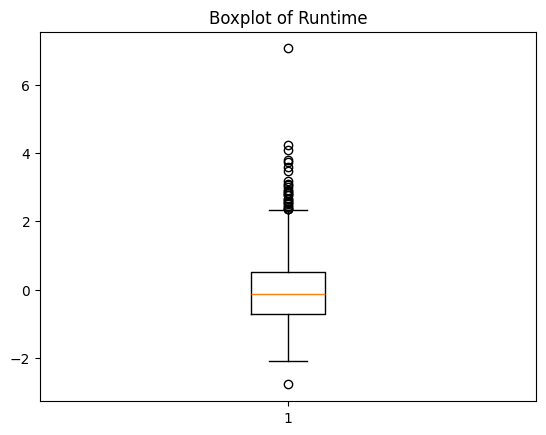

In [30]:
# Create box plot for 'Runtime' column
import matplotlib.pyplot as plt
plt.boxplot(movies['Runtime'])
plt.title('Boxplot of Runtime')
plt.show()
